In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("COVID Data Collection - Data for Peak Prediction.csv")

In [7]:
data.replace("Y",1,inplace=True)

In [9]:
data.replace("N",0,inplace=True)

In [10]:
data.head()

,Country,Young Population (Aged under 15 ),Working Age Population (Aged between 15 - 64),Elderly population (Aged 65 and over),Population,Population Density (per Km2),Political Ideology,Death Rate,Social Distancing (days),Wearing Face mask (days),14 day Quarantine (days),Boarders (days),School closures (days),Lockdown
0,Germany,13.50%,65%,21.47%,"83,783,942",240,Democratic,4.70%,99,44,70,91,52,1
1,Russia,17.91%,67.41%,14.67%,"145,934,462",9,Authoritarian,1.25%,45,64,0,104,0,1
2,United Kingdom,18.90%,63.10%,18.00%,67886011,281,Democratic,14.20%,99,15,60,105,87,1
3,France,18.1 %,62.2 %,19.7 %,65273511,119,Democratic,18.97%,55,51,50,70,55,1
4,Italy,13.5 %,63.5 %,23.0 %,"60,461,826",206,Democratic,14.41%,70,63,86,67,118,1


In [179]:
country=["Germany"
         ,"Russia"
         ,"United Kingdom","France","Italy","Spain","Ukraine","Poland","Romania","Netherlands","Belgium","Czech Republic","Greece","Portugal"
,"Sweden"
,"Hungary"
,"Belarus"
,"Austria"
,"Serbia"
,"Switzerland"
,"Bulgaria"
,"Denmark"
,"Finland"
,"Slovakia"
,"Norway"
,"Ireland"
,"Croatia"
,"Moldova"
,"Bosnia and Herzegovina"
,"Albania"
,"Lithuania"
,"North Macedonia"
,"Slovenia"
,"Latvia"
,"Estonia"
,"Montenegro"
,"Luxembourg"
,"Malta"
,"Iceland"
,"Canada"
,"Australia"
,"New Zealand"]

In [180]:
country

['Germany',
 'Russia',
 'United Kingdom',
 'France',
 'Italy',
 'Spain',
 'Ukraine',
 'Poland',
 'Romania',
 'Netherlands',
 'Belgium',
 'Czech Republic',
 'Greece',
 'Portugal',
 'Sweden',
 'Hungary',
 'Belarus',
 'Austria',
 'Serbia',
 'Switzerland',
 'Bulgaria',
 'Denmark',
 'Finland',
 'Slovakia',
 'Norway',
 'Ireland',
 'Croatia',
 'Moldova',
 'Bosnia and Herzegovina',
 'Albania',
 'Lithuania',
 'North Macedonia',
 'Slovenia',
 'Latvia',
 'Estonia',
 'Montenegro',
 'Luxembourg',
 'Malta',
 'Iceland',
 'Canada',
 'Australia',
 'New Zealand']

In [181]:
covid = pd.read_csv("owid-covid-data.csv")

In [182]:
covid["date"] = pd.to_datetime(covid["date"],format="%Y-%m-%d")

In [183]:
covid.set_index("location",inplace=True)

In [184]:
covid.columns

Index(['iso_code', 'continent', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand'],
      dtype='object')

In [185]:
germany = covid.loc[(covid["total_cases"]>30)&(covid.index=="Germany"),["date","total_cases"]]

In [186]:
max = germany["total_cases"].max()

In [187]:
min = germany["total_cases"].min()

In [188]:
germany

,date,total_cases
location,,
Germany,2020-02-28,47
Germany,2020-02-29,57
Germany,2020-03-01,111
Germany,2020-03-02,129
Germany,2020-03-03,157
Germany,2020-03-04,196
Germany,2020-03-05,262
Germany,2020-03-06,400
Germany,2020-03-07,684


In [189]:
max_date = germany.loc[germany["total_cases"]==max,"date"]

In [190]:
min_date = germany.loc[germany["total_cases"]==min,"date"]

In [191]:
max_date

location
Germany   2020-06-07
Name: date, dtype: datetime64[ns]

In [192]:
import datetime

In [193]:
germany_days = max_date - min_date

In [194]:
germany_day = germany_days.dt.days

In [195]:
day_list=[]

In [196]:
day_list.append(germany_day)

In [197]:
day_list

[location
 Germany    100
 Name: date, dtype: int64]

In [198]:
day_list = []

In [199]:
for i in country:
    each_country = covid.loc[(covid["total_cases"]>30)&(covid.index==i),["date","total_cases"]]
    max_count = each_country["total_cases"].max()
    min_count = each_country["total_cases"].min()
    max_date = each_country.loc[each_country["total_cases"]==max_count,"date"]
    min_date = each_country.loc[each_country["total_cases"]==min_count ,"date"]
    days_to_peak = max_date - min_date
    get_days = days_to_peak.dt.days
    day_list.append(get_days)
    

In [200]:
day_list

[location
 Germany    100
 Name: date, dtype: int64, location
 Russia    85
 Name: date, dtype: int64, location
 United Kingdom    97
 Name: date, dtype: int64, location
 France    100
 Name: date, dtype: int64, location
 Italy    105
 Name: date, dtype: int64, location
 Spain    99
 Name: date, dtype: int64, location
 Ukraine    76
 Ukraine    77
 Name: date, dtype: int64, location
 Poland    87
 Name: date, dtype: int64, location
 Romania    87
 Name: date, dtype: int64, location
 Netherlands    94
 Name: date, dtype: int64, location
 Belgium    93
 Name: date, dtype: int64, location
 Czech Republic    90
 Name: date, dtype: int64, location
 Greece    93
 Name: date, dtype: int64, location
 Portugal    89
 Name: date, dtype: int64, location
 Sweden    94
 Name: date, dtype: int64, location
 Hungary    83
 Hungary    84
 Name: date, dtype: int64, location
 Belarus    82
 Belarus    81
 Name: date, dtype: int64, location
 Austria    93
 Name: date, dtype: int64, location
 Serbia    85


In [309]:
covid_data = pd.read_csv("COVID Data Collection- Data for Peak Prediction.csv")

In [310]:
covid_data.set_index("Country",inplace= True)

In [311]:
covid_data.head()

,Young Population (Aged under 15 ),Working Age Population (Aged between 15 - 64),Elderly population (Aged 65 and over),Population,Population Density (per Km2),Political Ideology,Death Rate,Social Distancing (days),Wearing Face mask (days),14 day Quarantine (days),Boarders (days),School closures (days),Lockdown,Days to Peak
Country,,,,,,,,,,,,,,
USA,18.62%,65.35%,16.03%,32823952,34,Democratic,5.60%,103,0,149,109,106,Y,NaN
Germany,13.50%,65.00%,21.47%,83783942,240,Democratic,4.70%,49,44,70,91,52,Y,100.0
Russia,17.91%,67.41%,14.67%,145934462,9,Authoritarian,1.25%,45,64,0,104,0,Y,85.0
United Kingdom,18.90%,63.10%,18.00%,67886011,281,Democratic,14.20%,99,15,60,105,87,Y,97.0
France,18.1 %,62.2 %,19.7 %,65273511,119,Democratic,18.97%,55,51,50,70,55,Y,100.0


In [312]:
covid_data.replace("Y",1,inplace = True)
covid_data.replace("N",0,inplace=True)

In [313]:
covid_data.replace("Democratic",1,inplace = True)
covid_data.replace("Authoritarian",0,inplace = True)

In [314]:
covid_data.dtypes

Young Population\n(Aged under 15 )                 object
Working Age Population\n(Aged between 15 - 64)     object
Elderly population\n(Aged 65 and over)             object
Population                                          int64
Population Density \n(per Km2)                      int64
Political Ideology                                  int64
Death Rate                                         object
Social Distancing\n(days)                           int64
Wearing Face mask\n(days)                           int64
14 day Quarantine\n(days)                           int64
Boarders\n(days)                                    int64
School closures\n(days)                             int64
Lockdown                                            int64
Days to Peak                                      float64
dtype: object

In [412]:
covid_data

,Young Population (Aged under 15 ),Working Age Population (Aged between 15 - 64),Elderly population (Aged 65 and over),Population,Population Density (per Km2),Political Ideology,Death Rate,Social Distancing (days),Wearing Face mask (days),14 day Quarantine (days),Boarders (days),School closures (days),Lockdown,Days to Peak
Country,,,,,,,,,,,,,,
USA,0.1862,0.6535,0.1603,32823952,34,1,0.0560,103,0,149,109,106,1,NaN
Germany,0.1350,0.6500,0.2147,83783942,240,1,0.0470,49,44,70,91,52,1,100.0
Russia,0.1791,0.6741,0.1467,145934462,9,0,0.0125,45,64,0,104,0,1,85.0
United Kingdom,0.1890,0.6310,0.1800,67886011,281,1,0.1420,99,15,60,105,87,1,97.0
France,0.1810,0.6220,0.1970,65273511,119,1,0.1897,55,51,50,70,55,1,100.0
Italy,0.1350,0.6350,0.2300,60461826,206,1,0.1441,70,63,86,67,118,1,105.0
Spain,0.1470,0.6590,0.1940,46754778,94,1,0.0940,56,41,99,105,113,1,99.0
Ukraine,0.1550,0.6800,0.1650,43733762,75,1,0.0292,38,0,111,78,111,1,76.0
Poland,0.1480,0.6840,0.1680,37846611,124,1,0.0440,29,75,107,90,106,1,87.0


In [316]:
# df['col'] = df['col'].str.rstrip('%').astype('float') / 100.0
covid_data["Young Population\n(Aged under 15 )"] = covid_data["Young Population\n(Aged under 15 )"].str.rstrip('%').astype('float') / 100.0
covid_data["Working Age Population\n(Aged between 15 - 64)"] = covid_data["Working Age Population\n(Aged between 15 - 64)"].str.rstrip('%').astype('float') / 100.0
covid_data["Elderly population\n(Aged 65 and over)"] = covid_data["Elderly population\n(Aged 65 and over)"].str.rstrip("%").astype('float') / 100.0

In [317]:
covid_data["Death Rate"] = covid_data["Death Rate"].str.rstrip('%').astype('float') / 100.0

In [389]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [390]:
X = covid_data.loc["Germany":,:"Lockdown"]

In [391]:
covid_data["Days to Peak"]

Country
USA                         NaN
Germany                   100.0
Russia                     85.0
United Kingdom             97.0
France                    100.0
Italy                     105.0
Spain                      99.0
Ukraine                    76.0
Poland                     87.0
Romania                    87.0
Netherlands                94.0
Belgium                    93.0
Czech Republic             90.0
Greece                     93.0
Portugal                   89.0
Sweden                     94.0
Hungary                    83.0
Belarus                    82.0
Austria                    93.0
Serbia                     85.0
Switzerland                95.0
Bulgaria                   85.0
Denmark                    91.0
Finland                    89.0
Slovakia                   84.0
Norway                     94.0
Ireland                    88.0
Croatia                    83.0
Moldova                    80.0
Bosnia and Herzegovina     79.0
Albania                    85.0


In [392]:
Y = covid_data["Days to Peak"].dropna()

In [393]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)

In [394]:
x_train.shape

(33, 13)

In [408]:
len(x_test)

9

In [395]:
regr = LinearRegression()

In [396]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [397]:
y_predict = regr.predict(x_test)

Text(0, 0.5, 'Predicted days')

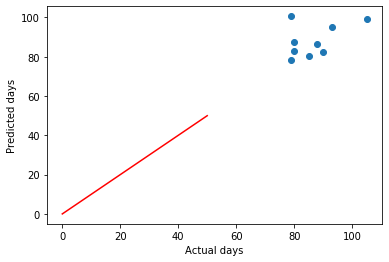

In [398]:
plt.scatter(y_test, y_predict)
plt.plot([0,50],[0,50],"r")
plt.xlabel("Actual days")
plt.ylabel("Predicted days")

In [399]:
y_predict - y_test

Country
Lithuania                  2.902480
Luxembourg                -4.521716
Moldova                    7.675718
Italy                     -5.974527
Belgium                    2.319865
Ireland                   -1.670642
Bosnia and Herzegovina    -0.467072
Czech Republic            -7.776746
Malta                     21.614473
Name: Days to Peak, dtype: float64

In [401]:
usa = covid_data.loc["USA",:"Lockdown"]

In [402]:
usa = usa.values.reshape(1,13)

In [403]:
usa_predict = regr.predict(usa)

### 87 days after USA will reach its peak, which is on 5/21

In [404]:
usa_predict

array([87.55054348])

In [405]:
each_country = covid.loc[(covid["total_cases"]>30)&(covid.index=="United States"),["date","total_cases"]]
max_count = each_country["total_cases"].max()
min_count = each_country["total_cases"].min()
max_date = each_country.loc[each_country["total_cases"]==max_count,"date"]
min_date = each_country.loc[each_country["total_cases"]==min_count ,"date"]
days_to_peak = max_date - min_date
get_days = days_to_peak.dt.days
day_list.append(get_days)


In [407]:
max_date

location
United States   2020-06-07
Name: date, dtype: datetime64[ns]